1--
# 等宽法 → 将数据均匀划分成n等份，每份的间距相等
# pd.cut(ages,bins)
# cut_1.codes：获得分组的codes码

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ages = [20,22,25,27,21,23,37,31,61,45,41,32]
# 划分18到25，26到35，36到60，60以上
bins = [0,25,35,60,100]

In [5]:
cut_1 = pd.cut(ages,bins)
print(cut_1) # 返回的事categorical对象

[(0, 25], (0, 25], (0, 25], (25, 35], (0, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(0, 25] < (25, 35] < (35, 60] < (60, 100]]


In [9]:
# 0-3对应分组后的四个区间，用代号来注释数据对应区间，结果为ndarry
print(cut_1.codes)
print(type(cut_1.codes))

[0 0 0 1 0 0 2 1 3 2 2 1]
<class 'numpy.ndarray'>


In [10]:
# 四个区间，结果为index
print(cut_1.categories)
print(type(cut_1.categories))

IntervalIndex([(0, 25], (25, 35], (35, 60], (60, 100]]
              closed='right',
              dtype='interval[int64]')
<class 'pandas.core.indexes.interval.IntervalIndex'>


In [11]:
# 按区间计数
print(pd.value_counts(cut_1))

(0, 25]      5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64


In [14]:
df = pd.DataFrame({'ages':ages})
df

,ages
0,20
1,22
2,25
3,27
4,21
5,23
6,37
7,31
8,61
9,45


In [15]:
s = pd.cut(df['ages'],bins)
s

0       (0, 25]
1       (0, 25]
2       (0, 25]
3      (25, 35]
4       (0, 25]
5       (0, 25]
6      (35, 60]
7      (25, 35]
8     (60, 100]
9      (35, 60]
10     (35, 60]
11     (25, 35]
Name: ages, dtype: category
Categories (4, interval[int64]): [(0, 25] < (25, 35] < (35, 60] < (60, 100]]

In [16]:
df['ages_s'] = s

In [17]:
# 按s的键值由大到小排序
cut_counts = s.value_counts(sort=False)
cut_counts

(0, 25]      5
(25, 35]     3
(35, 60]     3
(60, 100]    1
Name: ages, dtype: int64

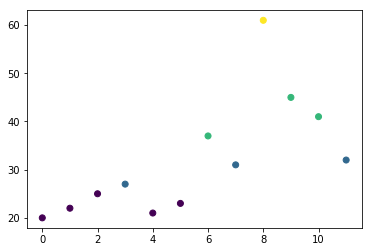

In [18]:
# 用颜色区分codes
plt.scatter(df.index,df["ages"],c=cut_1.codes)

3--# 等频法 → 以相同数量的记录放进每个区间
# qcut方法
qcut(data,n)

In [19]:
data = np.random.randn(1000)
s = pd.Series(data)
cut_2 = pd.qcut(s,4) #把S分成四份
cut_2.head()

0                 (-0.0305, 0.668]
1                   (0.668, 2.694]
2    (-3.2239999999999998, -0.631]
3                 (-0.0305, 0.668]
4    (-3.2239999999999998, -0.631]
dtype: category
Categories (4, interval[float64]): [(-3.2239999999999998, -0.631] < (-0.631, -0.0305] < (-0.0305, 0.668] < (0.668, 2.694]]

In [20]:
pd.value_counts(cut_2)

(0.668, 2.694]                   250
(-0.0305, 0.668]                 250
(-0.631, -0.0305]                250
(-3.2239999999999998, -0.631]    250
dtype: int64

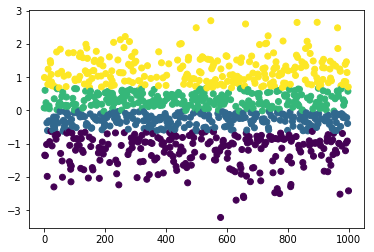

In [21]:
plt.scatter(s.index,s,c=pd.qcut(data,4).codes)